Import Packages

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [22]:
parent_dir = '../../../data/thread_ring/1/'

N = 1_000_000
R = 100_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}5/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}5/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}5/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}5/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [23]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 28 09:55:04 2025 +0100) (509.12ms ela...,0.363,0.0305,0.606,2.41,0.16,11.58,51.82 C,Nominal
1,(Fri Mar 28 09:55:04 2025 +0100) (508.40ms ela...,1.280,0.0621,0.720,2.44,0.38,29.66,51.82 C,Nominal
2,(Fri Mar 28 09:55:05 2025 +0100) (508.20ms ela...,0.234,0.0271,0.516,1.07,0.18,12.33,51.47 C,Nominal
3,(Fri Mar 28 09:55:05 2025 +0100) (508.70ms ela...,0.425,0.0281,0.408,1.15,0.23,16.87,51.47 C,Nominal
4,(Fri Mar 28 09:55:06 2025 +0100) (506.79ms ela...,5.930,0.0278,0.499,6.70,1.15,99.97,51.12 C,Nominal


In [24]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(556, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 28 09:55:15 2025 +0100) (1010.83ms el...,39.4,0.0420,0.961,42.32,3.93,98.57,54.73 C,Nominal
1,(Fri Mar 28 09:55:16 2025 +0100) (1006.64ms el...,35.4,0.0433,1.080,38.65,3.85,97.98,58.44 C,Nominal
2,(Fri Mar 28 09:55:17 2025 +0100) (1006.09ms el...,34.6,0.0431,1.520,38.15,3.91,98.47,60.71 C,Nominal
3,(Fri Mar 28 09:55:18 2025 +0100) (1003.64ms el...,35.3,0.0454,1.200,38.56,3.91,98.47,62.69 C,Nominal
4,(Fri Mar 28 09:55:19 2025 +0100) (1005.82ms el...,35.5,0.0419,1.120,38.62,3.76,98.34,65.03 C,Nominal


In [25]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 4 13:47:02 2025 +0200) (510.61ms elap...,2.1100,0.0252,0.402,2.35,0.31,21.31,44.89 C,Nominal
1,(Fri Apr 4 13:47:02 2025 +0200) (509.25ms elap...,0.8990,0.0349,0.369,1.05,0.16,13.47,44.97 C,Nominal
2,(Fri Apr 4 13:47:03 2025 +0200) (507.21ms elap...,0.3420,0.0000,0.261,0.41,0.07,5.42,44.97 C,Nominal
3,(Fri Apr 4 13:47:03 2025 +0200) (508.19ms elap...,0.0537,0.0000,0.264,0.09,0.03,2.10,45.28 C,Nominal
4,(Fri Apr 4 13:47:04 2025 +0200) (508.01ms elap...,0.0916,0.0000,0.277,0.14,0.05,3.17,45.28 C,Nominal


In [26]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(633, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 4 13:47:14 2025 +0200) (1009.08ms ela...,17.90,0.0,0.714,18.58,2.27,96.11,46.00 C,Nominal
1,(Fri Apr 4 13:47:15 2025 +0200) (1005.48ms ela...,17.80,0.0,0.692,18.50,2.19,96.13,48.17 C,Nominal
2,(Fri Apr 4 13:47:16 2025 +0200) (1007.49ms ela...,18.50,0.0,0.839,19.27,2.35,96.54,49.97 C,Nominal
3,(Fri Apr 4 13:47:17 2025 +0200) (1006.82ms ela...,8.98,0.0,0.729,9.70,0.97,77.81,51.39 C,Nominal
4,(Fri Apr 4 13:47:18 2025 +0200) (1006.37ms ela...,6.21,0.0,0.539,6.85,0.75,73.45,51.11 C,Nominal


Clean the Data

In [27]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [28]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [29]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-28 09:55:04,0.363,0.0305,0.606,2.41,0.16,11.58,51.82,Nominal,509.12
1,2025-03-28 09:55:04,1.280,0.0621,0.720,2.44,0.38,29.66,51.82,Nominal,508.40
2,2025-03-28 09:55:05,0.234,0.0271,0.516,1.07,0.18,12.33,51.47,Nominal,508.20
3,2025-03-28 09:55:05,0.425,0.0281,0.408,1.15,0.23,16.87,51.47,Nominal,508.70
4,2025-03-28 09:55:06,5.930,0.0278,0.499,6.70,1.15,99.97,51.12,Nominal,506.79


In [30]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(556, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-28 09:55:15,39.4,0.0420,0.961,42.32,3.93,98.57,54.73,Nominal,1010.83
1,2025-03-28 09:55:16,35.4,0.0433,1.080,38.65,3.85,97.98,58.44,Nominal,1006.64
2,2025-03-28 09:55:17,34.6,0.0431,1.520,38.15,3.91,98.47,60.71,Nominal,1006.09
3,2025-03-28 09:55:18,35.3,0.0454,1.200,38.56,3.91,98.47,62.69,Nominal,1003.64
4,2025-03-28 09:55:19,35.5,0.0419,1.120,38.62,3.76,98.34,65.03,Nominal,1005.82


In [31]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-04 13:47:02,2.1100,0.0252,0.402,2.35,0.31,21.31,44.89,Nominal,510.61
1,2025-04-04 13:47:02,0.8990,0.0349,0.369,1.05,0.16,13.47,44.97,Nominal,509.25
2,2025-04-04 13:47:03,0.3420,0.0000,0.261,0.41,0.07,5.42,44.97,Nominal,507.21
3,2025-04-04 13:47:03,0.0537,0.0000,0.264,0.09,0.03,2.10,45.28,Nominal,508.19
4,2025-04-04 13:47:04,0.0916,0.0000,0.277,0.14,0.05,3.17,45.28,Nominal,508.01


In [32]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(633, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-04 13:47:14,17.90,0.0,0.714,18.58,2.27,96.11,46.00,Nominal,1009.08
1,2025-04-04 13:47:15,17.80,0.0,0.692,18.50,2.19,96.13,48.17,Nominal,1005.48
2,2025-04-04 13:47:16,18.50,0.0,0.839,19.27,2.35,96.54,49.97,Nominal,1007.49
3,2025-04-04 13:47:17,8.98,0.0,0.729,9.70,0.97,77.81,51.39,Nominal,1006.82
4,2025-04-04 13:47:18,6.21,0.0,0.539,6.85,0.75,73.45,51.11,Nominal,1006.37


Visualize the Data

In [33]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


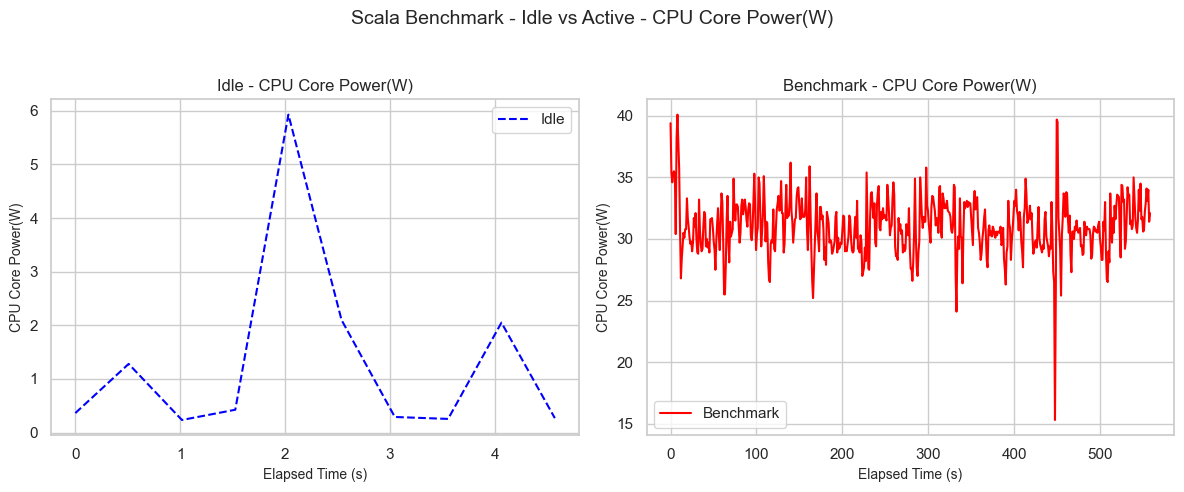

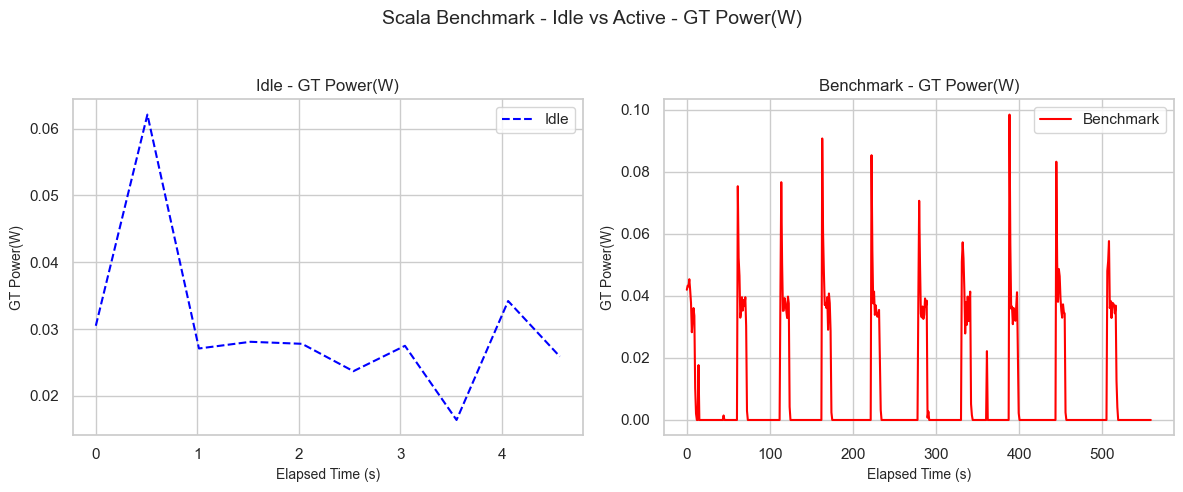

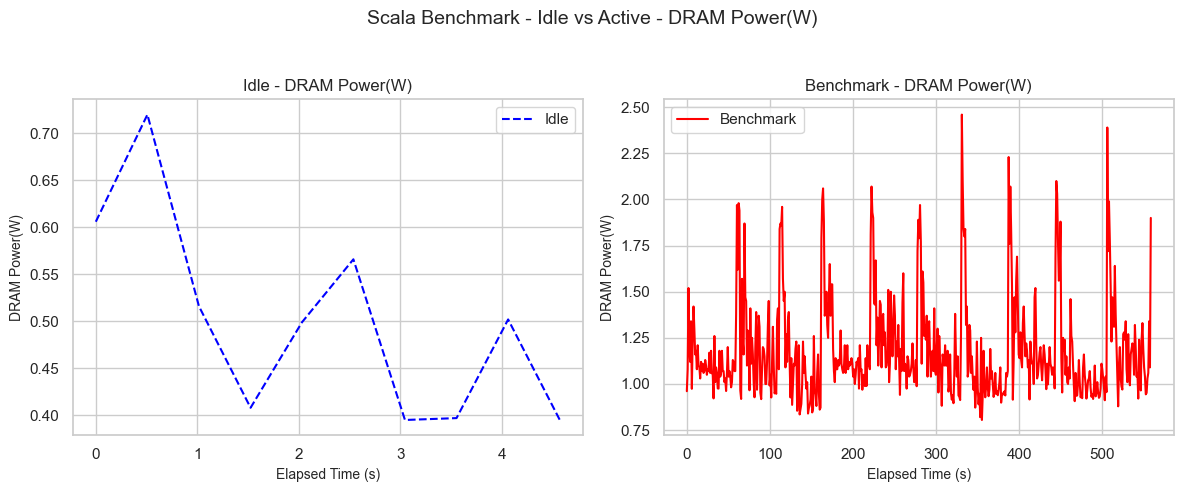

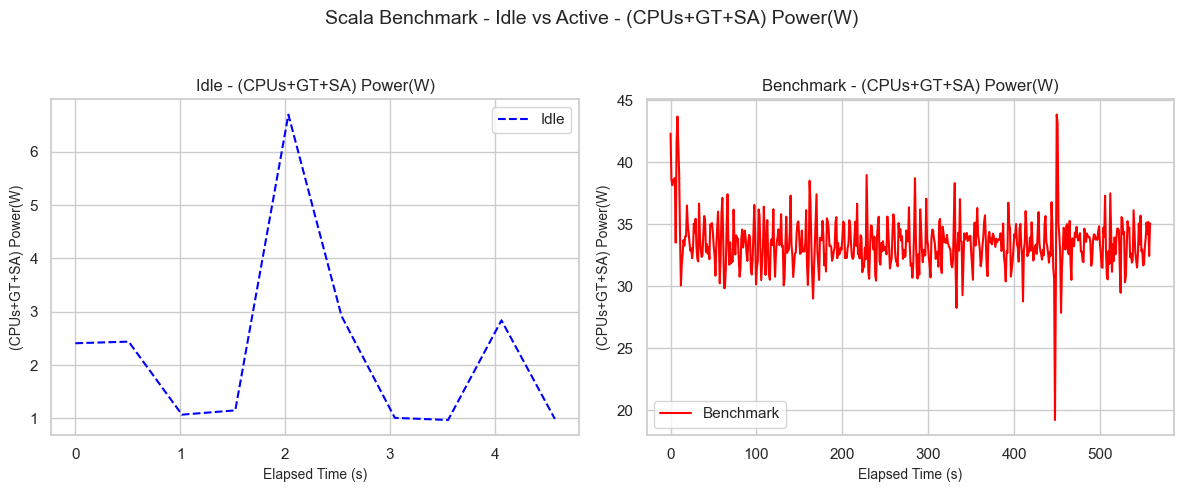

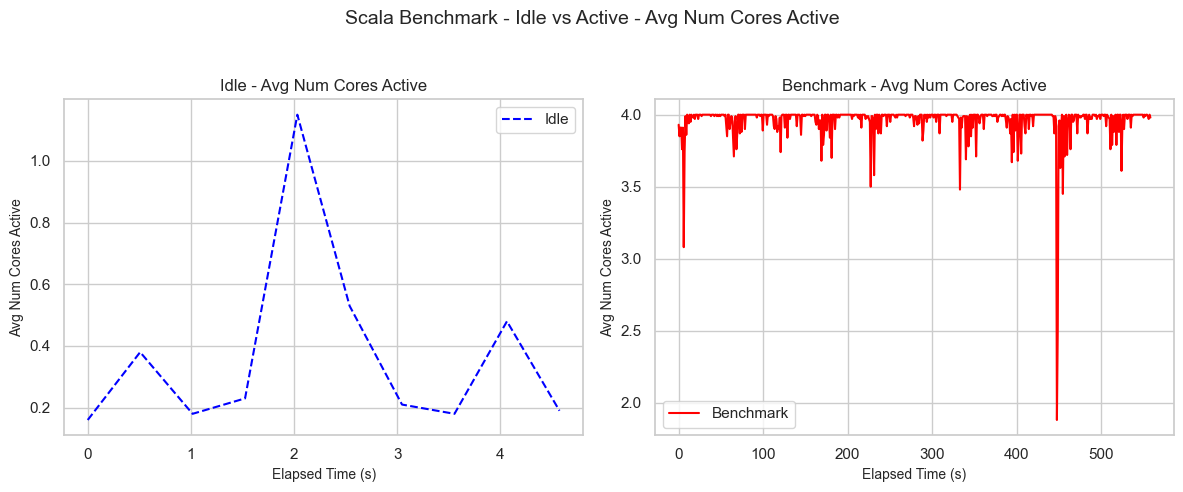

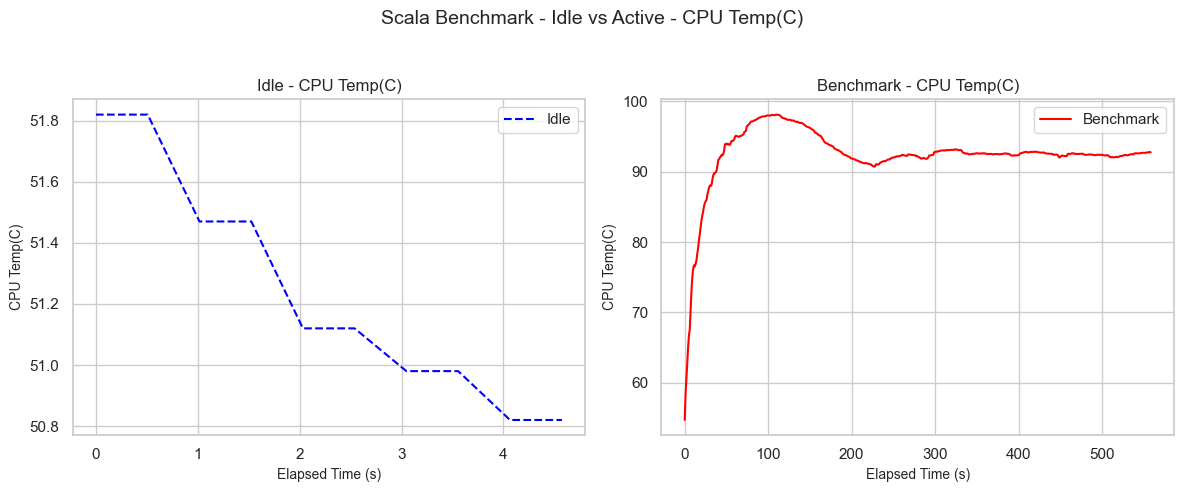

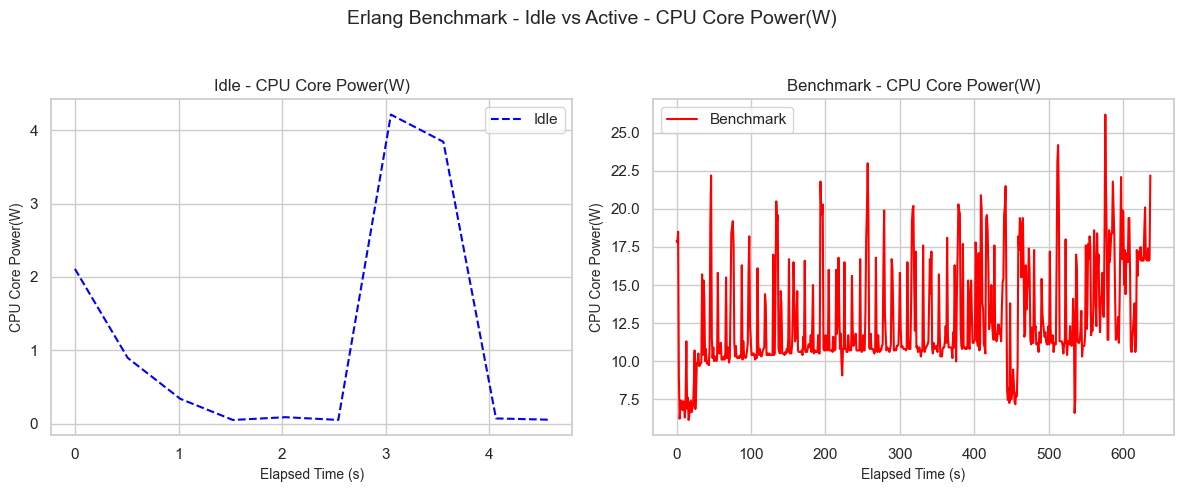

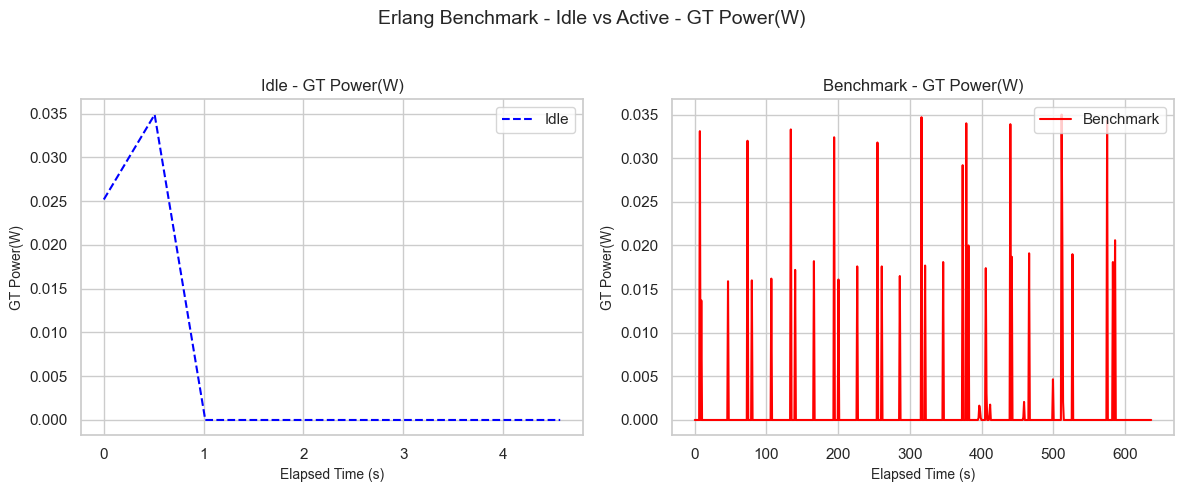

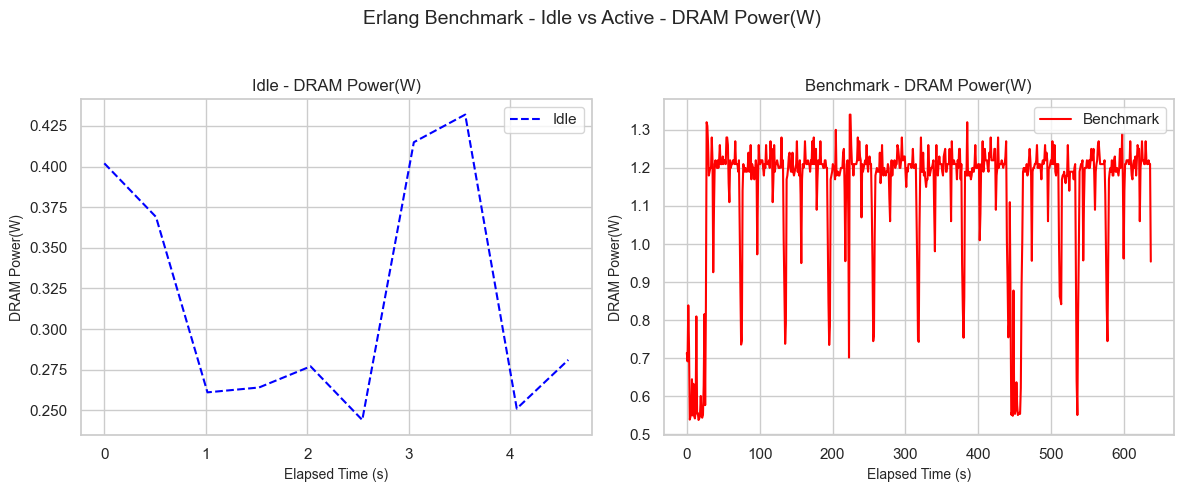

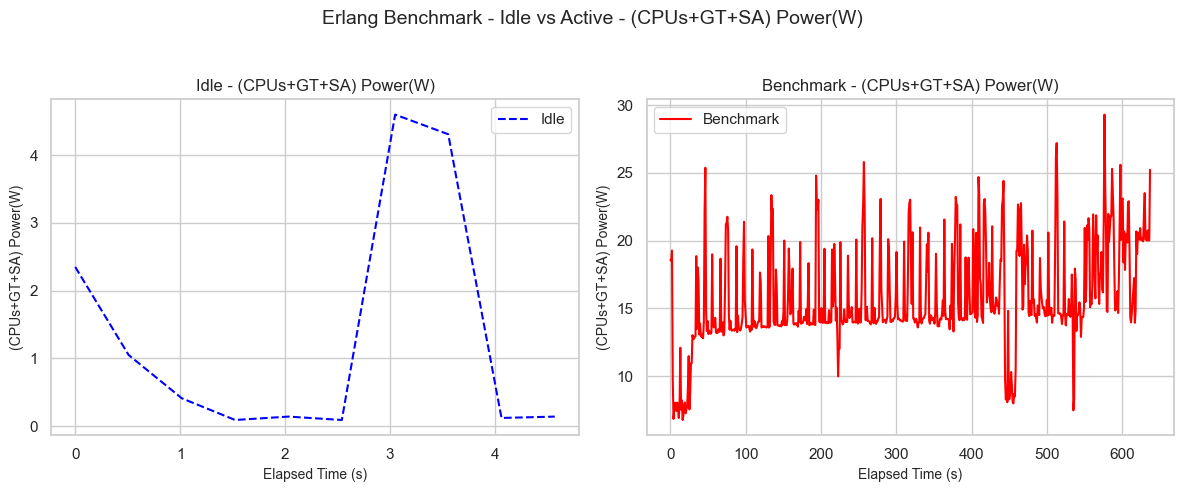

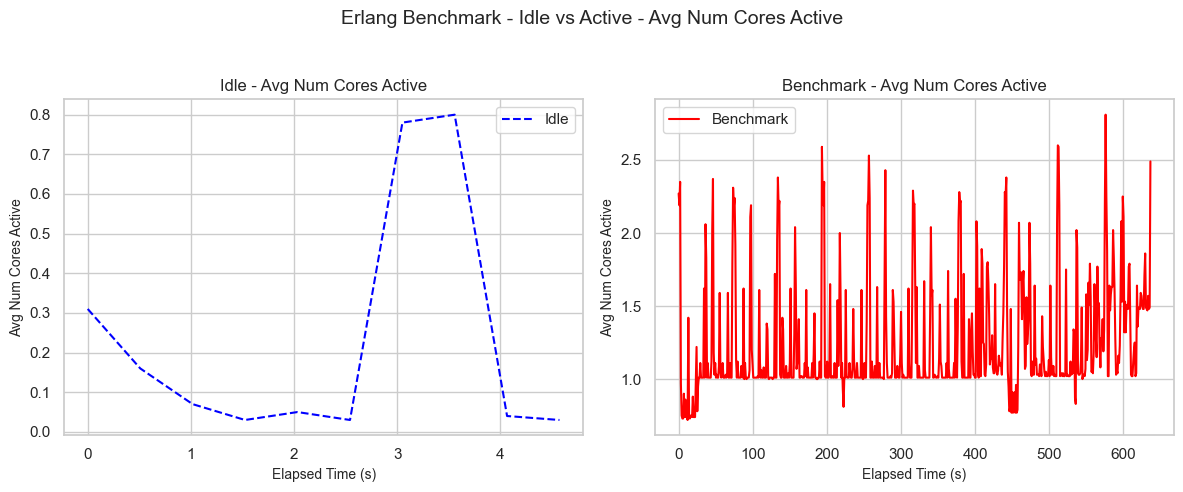

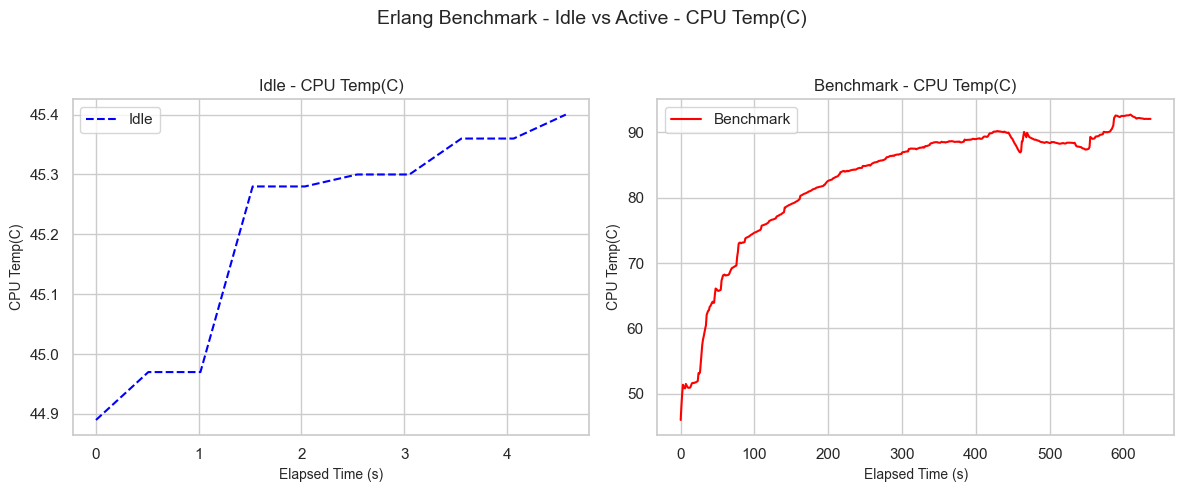

In [34]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [35]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        # ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [36]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

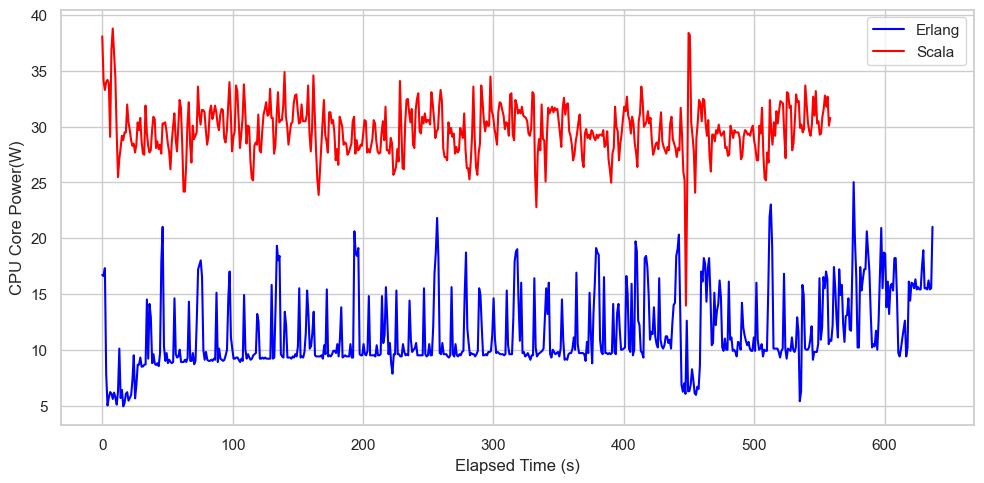

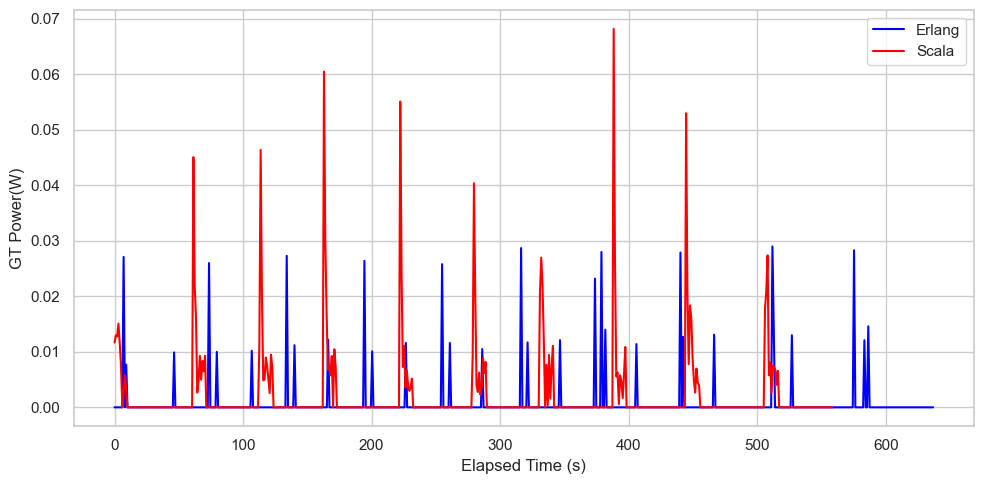

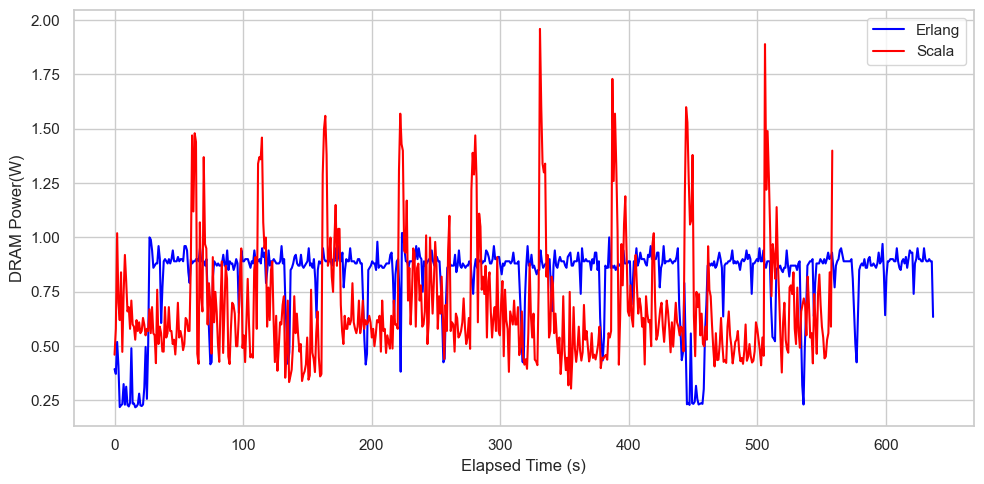

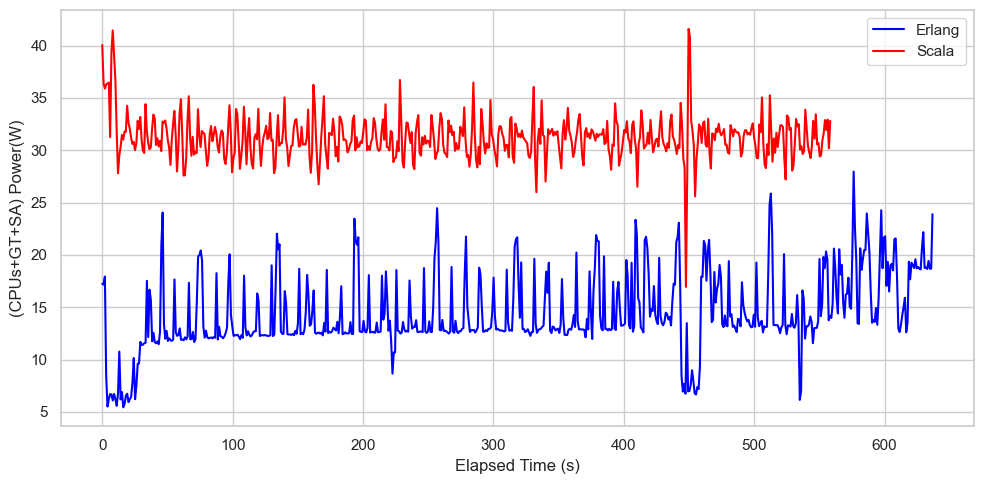

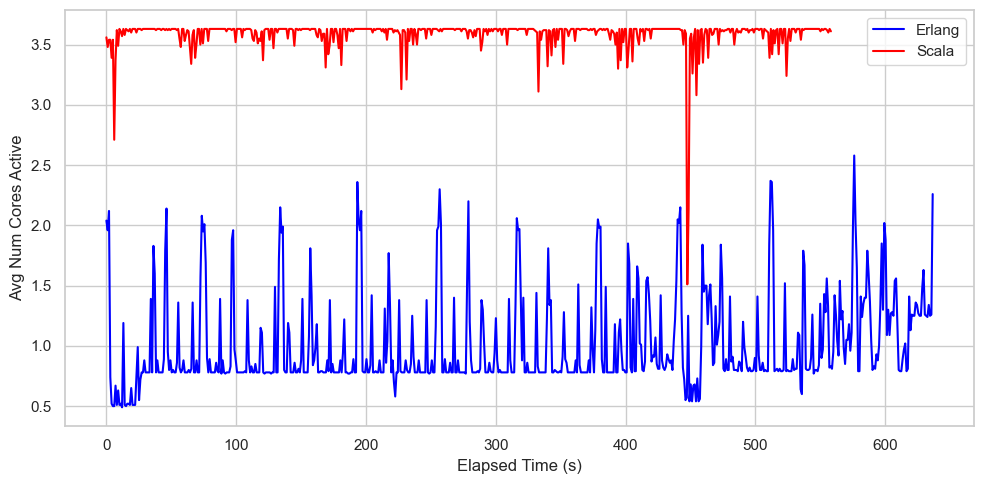

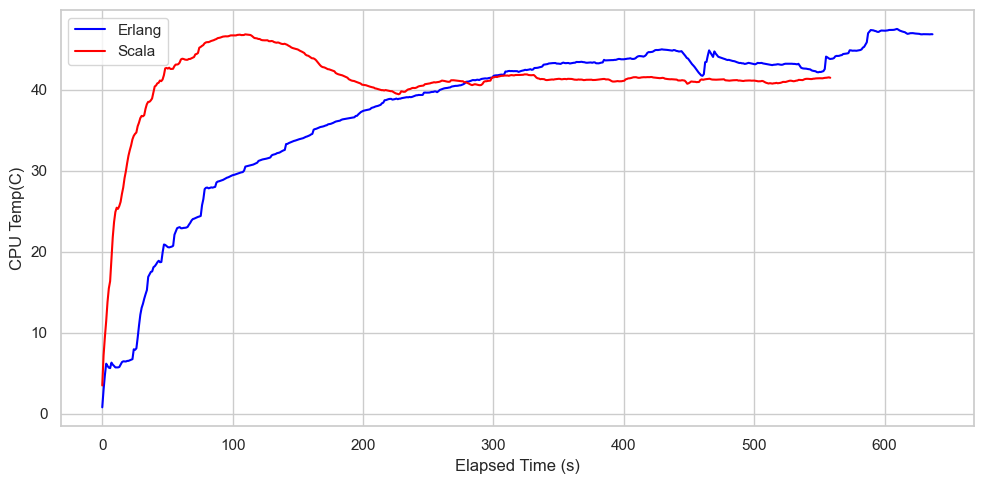

In [37]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [38]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [39]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Scala Idle Metrics:")
print(scala_idle_means, "\n")
print("Erlang Idle Metrics:")
print(erlang_idle_means, "\n")
print("Scala Benchmark Metrics:")
print(scala_bench_data[metrics_columns].mean(), "\n")
print("Erlang Benchmark Metrics:")
print(erlang_bench_data[metrics_columns].mean(), "\n")

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Scala Idle Metrics:
CPU Core Power(W)         1.31940
GT Power(W)               0.03033
DRAM Power(W)             0.50040
(CPUs+GT+SA) Power(W)     2.25000
CPU Temp(C)              51.24200
Avg Num Cores Active      0.36900
dtype: float64 

Erlang Idle Metrics:
CPU Core Power(W)         1.17333
GT Power(W)               0.00601
DRAM Power(W)             0.31960
(CPUs+GT+SA) Power(W)     1.33000
CPU Temp(C)              45.21100
Avg Num Cores Active      0.23000
dtype: float64 

Scala Benchmark Metrics:
CPU Core Power(W)        31.057014
GT Power(W)               0.008315
DRAM Power(W)             1.184016
(CPUs+GT+SA) Power(W)    33.480414
CPU Temp(C)              92.348813
Avg Num Cores Active      3.958777
dtype: float64 

Erlang Benchmark Metrics:
CPU Core Power(W)        12.658752
GT Power(W)               0.001162
DRAM Power(W)             1.138840
(CPUs+GT+SA) Power(W)    15.712954
CPU Temp(C)              82.850664
Avg Num Cores Active      1.241169
dtype: float64 

Net Average 

Compute Total Energy Consumption

In [40]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy,
    "Erlang Total Time(s)": erlang_total_time,
    "Scala Total Time(s)": scala_total_time,
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/thread_ring/1/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 17014.228293495456 Joules
Erlang Benchmark: 7846.704633472796 Joules
